# Natural Language Processing with Disaster Tweets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd

## Load Data

In [2]:
#read the train csv file
train_data=pd.read_csv(r"C:\Users\S.Saravanan\Desktop\train.csv")
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
#read the test csv file
test_data=pd.read_csv(r"C:\Users\S.Saravanan\Desktop\test.csv")
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Explore Data

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
#Unique words
train_data.keyword.unique()[:5]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident'],
      dtype=object)

In [7]:
train_data.location.unique()[:5]

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA',
       'Philadelphia, PA'], dtype=object)

In [8]:
#print the shape of train data
print(train_data.shape)
print(train_data.target.value_counts())

(7613, 5)
0    4342
1    3271
Name: target, dtype: int64


In [9]:
#print the size of test data
test_data.shape

(3263, 4)

In [10]:
#print info method
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
#print describe method
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
#find null values
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
#find notnull values
train_data.notnull().sum()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [14]:
#deletion of null value columns
del train_data['id']
del train_data['keyword']
del train_data['location']

In [15]:
#print the lower string
lower_string = train_data['text'][0].lower()
lower_string

'our deeds are the reason of this #earthquake may allah forgive us all'

## Text Normalization

In [16]:
import re
def remove_between_square_brackets(text, remove_digits=True):
      return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
      pattern=r'[^a-zA-z0-9\s]'
      text=re.sub(pattern,'',text) 
      return text

In [17]:
train_data['text'] = train_data['text'].apply(remove_special_characters)
train_data['text'] = train_data['text'].apply(remove_between_square_brackets)
test_data['text'] = test_data['text'].apply(remove_special_characters)
test_data['text'] = test_data['text'].apply(remove_between_square_brackets)

### Split the Dataset 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (
    train_test_split(train_data["text"].to_numpy(),
                     train_data["target"].to_numpy(),
                     test_size=0.1,
                     random_state=42)
)

len(X_train), len(X_test), len(y_train), len(y_test)

(6851, 762, 6851, 762)

## Visualizing the Tweets

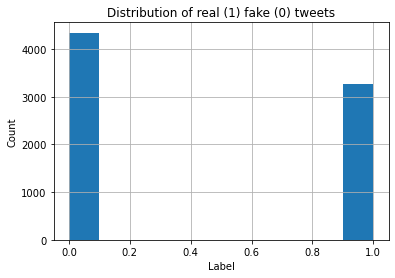

In [19]:
import matplotlib.pyplot as plt
train_data.target.hist()
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of real (1) fake (0) tweets")
plt.show()

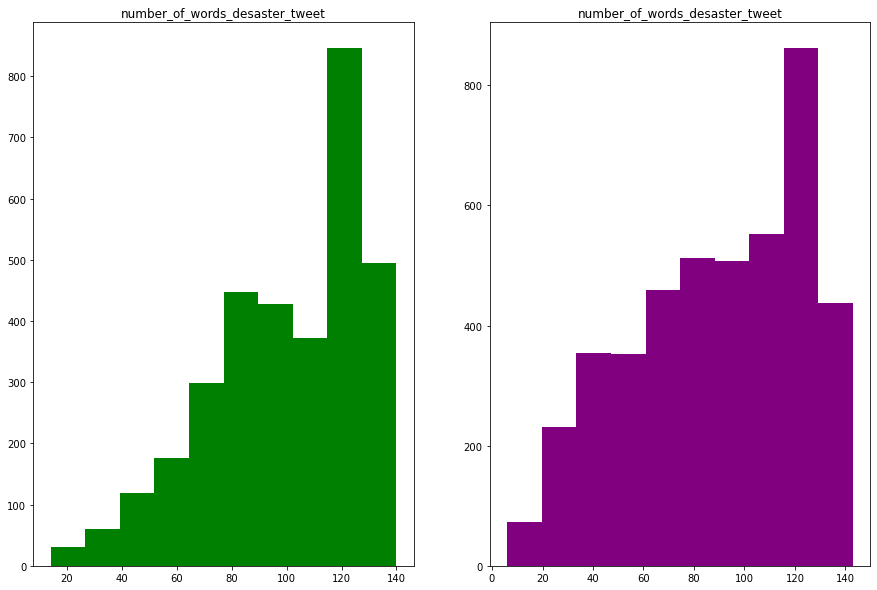

In [20]:
number_of_words_desaster_tweet = train_data[train_data.target==1].text.str.len()
number_of_words_non_desaster_tweet = train_data[train_data.target==0].text.str.len()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
ax1.hist(number_of_words_desaster_tweet, color = 'green')
ax2.hist(number_of_words_non_desaster_tweet, color  = 'purple')
ax1.set_title("number_of_words_desaster_tweet")
ax2.set_title("number_of_words_desaster_tweet")
plt.show()

### Using Vectorizer

In [21]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english' , ngram_range=(1,1))
vectorizer.fit(X_train)
#vectorizer.get_feature_names_out()
x_train=vectorizer.transform(X_train)
x_test=vectorizer.transform(X_test)
test_texts= vectorizer.transform(test_data["text"])

## Model Building

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)

In [24]:
predict = clf.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix
#find accuracy_score
print("Accuracy Score is :",accuracy_score(y_test,predict))

Accuracy Score is : 0.7716535433070866


### Confusion matrix

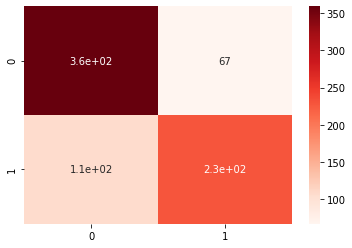

In [26]:
#find confusion matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

### Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       426
           1       0.77      0.68      0.72       336

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.77       762



In [28]:
s_submission = pd.read_csv(r"C:\Users\S.Saravanan\Desktop\sample_submission.csv")

In [29]:
s_submission["target"] = clf.predict(test_texts)
s_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [30]:
s_submission.to_csv('Submission.csv',index=False)

In [31]:
pd.read_csv('Submission.csv')

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
